<a href="https://colab.research.google.com/github/sidesh27/Flight-Delay-Prediction/blob/master/Regression_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import seaborn as sns
import math
from sklearn.svm import LinearSVR
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from xgboost import XGBRegressor
from sklearn.utils.validation import column_or_1d
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [4]:
df = pd.read_csv("drive/My Drive/temp_merged.csv")

In [5]:
df = df[df.ArrDel15==1]

In [6]:
y = df['ArrDelayMinutes']
X = df.drop(columns=['Unnamed: 0', 'FlightDate', 'Quarter', 'Year', 'Month', 'DayofMonth',
       'Origin', 'Dest','ArrTime','ArrDel15','ArrDelayMinutes'])

In [7]:
X.columns

Index(['DepTime', 'DepDel15', 'CRSDepTime', 'DepDelayMinutes',
       'OriginAirportID', 'DestAirportID', 'CRSArrTime', 'windspeedKmph_x',
       'DewPointF_x', 'cloudcover_x', 'precipMM_x', 'pressure_x',
       'WindGustKmph_x', 'visibility_x', 'weatherCode_x', 'tempF_x',
       'WindChillF_x', 'winddirDegree_x', 'humidity_x', 'windspeedKmph_y',
       'DewPointF_y', 'cloudcover_y', 'precipMM_y', 'pressure_y',
       'WindGustKmph_y', 'visibility_y', 'weatherCode_y', 'tempF_y',
       'WindChillF_y', 'winddirDegree_y', 'humidity_y'],
      dtype='object')

In [8]:
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

In [9]:
new_df = pd.concat([x_test,y_test],axis=1)

REGRSSION - LINEAR REGRESSOR

In [10]:
xg = LinearRegression()
reg = xg.fit(x_train,y_train)

##REGRESSION ANALYSIS 

TO CHECK PERFORMANCE OF REGRESSOR IN DIFFERENT INTERVALS OF DELAY TIME 

In [11]:
 def reg_analysis(a,b): 
  rx_test1 = new_df[(new_df.ArrDelayMinutes>=a) & (new_df.ArrDelayMinutes<=b) ]
  ry_test1 = rx_test1['ArrDelayMinutes']
  rx_test1 = rx_test1.drop(columns=['ArrDelayMinutes'])
  y_pred = xg.predict(rx_test1)
  print("MAE : ",mean_absolute_error(ry_test1, y_pred))
  print("RMSE : ",math.sqrt(mean_squared_error(ry_test1, y_pred)))
  print("R2_SCORE : ",r2_score(ry_test1,y_pred))

In [12]:
reg_analysis(0.0,100.0)

MAE :  11.000844441619206
RMSE :  14.679854849986677
R2_SCORE :  0.5645756839625085


In [13]:
reg_analysis(100.0,200.0)

MAE :  17.868081558125077
RMSE :  27.050544008823934
R2_SCORE :  -0.003827125663399711


In [14]:
reg_analysis(200.0,500.0)

MAE :  19.560439187991292
RMSE :  31.14167588032571
R2_SCORE :  0.7694164293611163


In [15]:
reg_analysis(200.0,1000.0)

MAE :  19.66479451556453
RMSE :  31.112463037214972
R2_SCORE :  0.9402411622821892


In [16]:
reg_analysis(500.0,1000.0)

MAE :  21.042315576830266
RMSE :  30.668214143751253
R2_SCORE :  0.9483969557060996


In [17]:
reg_analysis(1000.0,2000.0)

MAE :  33.030050162717934
RMSE :  42.53609595091211
R2_SCORE :  0.9455758961189109


##BOX PLOT DISTRIBUTION OF DELAY MINUTES

Text(0.5, 0, 'Arrival Delay (in minutes)')

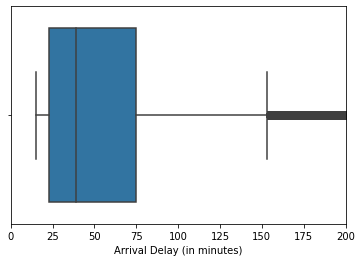

In [18]:
ax = sns.boxplot (x='ArrDelayMinutes',data=df)
ax.set_xlim([0,200]) 
ax.set_xlabel('Arrival Delay (in minutes)')

##HISTOGRAM PLOT OF DELAY MINUTES

(array([3.23567e+05, 4.89550e+04, 1.42320e+04, 1.12900e+03, 1.73000e+02]),
 array([   0,  100,  200,  500, 1000, 2000]),
 <a list of 5 Patch objects>)

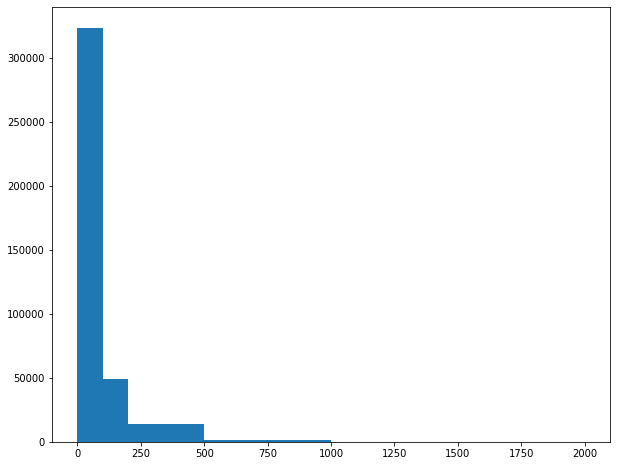

In [19]:
plt.figure(figsize=[10,8])

plt.hist(df['ArrDelayMinutes'],bins=[0,100,200,500,1000,2000])

##PIE CHART TO SHOW DISTRIBUTION OF DELAY

In [20]:
bins=[0,100,200,500,1000,2000]
sizes=[]
a=df[ (df['ArrDelayMinutes']>=0) & (df['ArrDelayMinutes'] <=100)]
sizes.append(a.shape[0])
a=df[ (df['ArrDelayMinutes']>=101) & (df['ArrDelayMinutes'] <=200)]
sizes.append(a.shape[0])
a=df[ (df['ArrDelayMinutes']>=201) & (df['ArrDelayMinutes'] <=500)]
sizes.append(a.shape[0])
a=df[ (df['ArrDelayMinutes']>=501) & (df['ArrDelayMinutes'] <=1000)]
sizes.append(a.shape[0])
a=df[ (df['ArrDelayMinutes']>=1001) & (df['ArrDelayMinutes'] <=2000)]
sizes.append(a.shape[0])

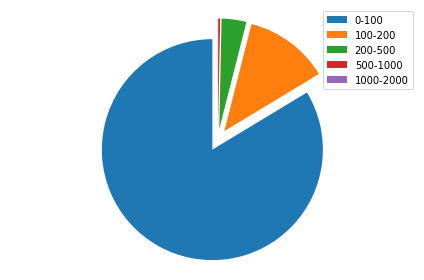

In [21]:
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = '0-100', '100-200', '200-500', '500-1000','1000-2000'
explode = (0.1, 0.1, 0.1, 0.1,0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

patches, texts = plt.pie(sizes, explode=explode, startangle=90)
plt.legend(patches, labels, loc="best")
plt.axis('equal')
plt.tight_layout()
plt.show()